In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

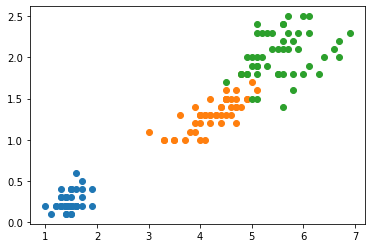

In [2]:
import numpy as np
from matplotlib import pyplot as plt
y_0 = np.where(y == 0)
plt.scatter(X[y_0, 0], X[y_0, 1])
y_1 = np.where(y == 1)
plt.scatter(X[y_1, 0], X[y_1, 1])
y_2 = np.where(y == 2)
plt.scatter(X[y_2, 0], X[y_2, 1])
plt.show()

In [3]:
k = 3
random_index = np.random.choice(range(len(X)), k)
centroids = X[random_index]
print(centroids)

[[6.  2.5]
 [4.3 1.3]
 [3.  1.1]]


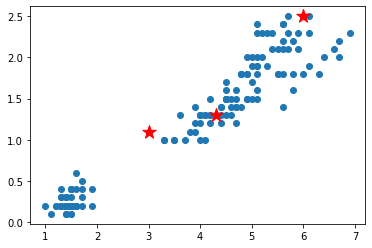

In [4]:
def visualize_centroids(X, centroids):
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = '*', s=200, c='red')
    plt.show()
visualize_centroids(X, centroids)

In [20]:
def dist(a, b):
    return np.linalg.norm(a - b, axis=1)

def assign_cluster(x, centroids):
    distances = dist(x, centroids)
    cluster = np.argmin(distances)
    return cluster

def update_centroids(X, centroids, clusters):
    for i in range(k):
        cluster_i = np.where(clusters == i)
        centroids[i] = np.mean(X[cluster_i], axis=0)
        

tol = 0.0001
max_iter = 100

In [21]:
iter = 0
centroids_diff = 100000
clusters = np.zeros(len(X))

Iteration: 1
Centroids:
 [[5.62608696 2.04782609]
 [4.29259259 1.35925926]
 [1.462      0.246     ]]
Centroids move: 0.0000


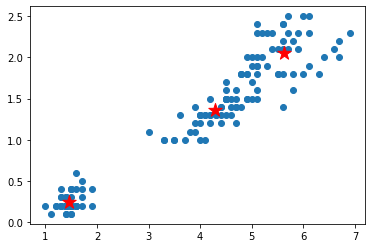

In [22]:
from copy import deepcopy
while iter < max_iter and centroids_diff > tol:
    for i in range(len(X)):
        clusters[i] = assign_cluster(X[i], centroids)
    centroids_prev = deepcopy(centroids)
    update_centroids(X, centroids, clusters)
    iter += 1
    centroids_diff = np.linalg.norm(centroids - centroids_prev)
    print('Iteration:', str(iter))
    print('Centroids:\n', centroids)
    print('Centroids move: {:5.4f}'.format(centroids_diff))
    visualize_centroids(X, centroids)

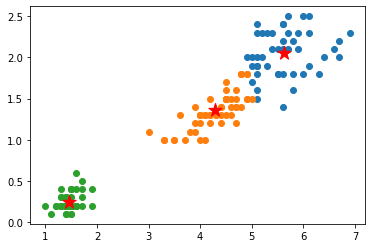

In [23]:
for i in range(k):
    cluster_i = np.where(clusters == i)
    plt.scatter(X[cluster_i, 0], X[cluster_i, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')
plt.show()

In [24]:
from sklearn.cluster import KMeans
kmeans_sk = KMeans(n_clusters=3, random_state=42)
kmeans_sk.fit(X)
clusters_sk = kmeans_sk.labels_
centroids_sk = kmeans_sk.cluster_centers_

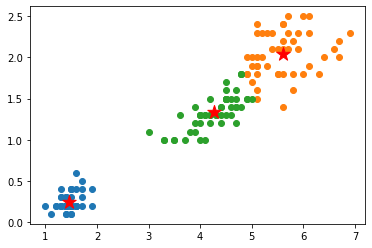

In [25]:
for i in range(k):
    cluster_i = np.where(clusters_sk == i)
    plt.scatter(X[cluster_i, 0], X[cluster_i, 1])
plt.scatter(centroids_sk[:, 0], centroids_sk[:, 1], marker='*', s=200, c='red')
plt.show()

In [26]:
k_list = list(range(1, 7))
sse_list = [0] * len(k_list)
print(sse_list)

[0, 0, 0, 0, 0, 0]


In [36]:
for k_ind, k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse = 0
    for i in range(k):
        cluster_i = np.where(clusters == i)
        sse += np.linalg.norm(X[cluster_i] - centroids[i])
    print('k={}, SSE={}'.format(k, sse))
    sse_list[k_ind] = sse

k=1, SSE=23.471159607768282
k=2, SSE=11.267116838758653
k=3, SSE=9.071807045694348
k=4, SSE=8.476299880745918
k=5, SSE=8.263529314616576
k=6, SSE=8.057299115100708


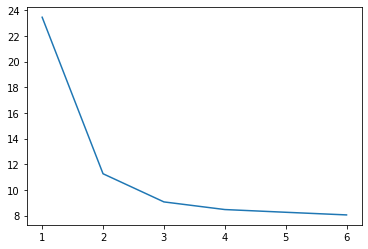

In [37]:
plt.plot(k_list, sse_list)
plt.show()

In [39]:
from sklearn.datasets import fetch_20newsgroups
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
groups = fetch_20newsgroups(subset='all', categories=categories)
labels = groups.target
label_names = groups.target_names

In [40]:
def is_letter_only(word):
    for char in word:
        if not char.isalpha():
            return False
    return True

In [42]:
from nltk.corpus import names
all_names = set(names.words())
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
    data_cleaned.append(doc_cleaned)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(stop_words='english', max_features=None, max_df=0.5, min_df=2)
data = count_vector.fit_transform(data_cleaned)

In [44]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=42)

In [45]:
clusters = kmeans.labels_
from collections import Counter
print(Counter(clusters))

Counter({3: 3363, 0: 12, 1: 9, 2: 3})


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english', max_features=None, max_df=0.5, min_df=2)
data = tfidf_vector.fit_transform(data_cleaned)

In [57]:
kmeans.fit(data)
clusters = kmeans.labels_
print(Counter(clusters))

Counter({2: 1465, 0: 781, 3: 610, 1: 531})


In [67]:
cluster_label = {i: labels[np.where(clusters == i)] for i in range(k)}
terms = tfidf_vector.get_feature_names()
centroids = kmeans.cluster_centers_
for cluster, index_list in cluster_label.items():
    counter = Counter(cluster_label[cluster])
    print('cluster_{}: {} samples'.format(cluster, len(index_list)))
    for label_index, count in sorted(counter.items(), key=lambda x: x[1], reverse=True):
        print('{}: {} samples'.format(label_names[label_index], count))
    print('Top 10 terms:')
    for ind in centroids[cluster].argsort()[-10:]:
        print(' %s' % terms[ind], end="")
    print()

cluster_0: 781 samples
comp.graphics: 731 samples
sci.space: 45 samples
alt.atheism: 4 samples
talk.religion.misc: 1 samples
Top 10 terms:
 format need know thanks looking university program file graphic image
cluster_1: 531 samples
sci.space: 529 samples
alt.atheism: 1 samples
comp.graphics: 1 samples
Top 10 terms:
 zoology just moon hst mission nasa wa launch shuttle space
cluster_2: 1465 samples
alt.atheism: 434 samples
sci.space: 412 samples
talk.religion.misc: 380 samples
comp.graphics: 239 samples
Top 10 terms:
 time people think know like ha just university article wa
cluster_3: 610 samples
alt.atheism: 360 samples
talk.religion.misc: 247 samples
comp.graphics: 2 samples
sci.space: 1 samples
Top 10 terms:
 article moral think morality jesus people wa say christian god


In [74]:
k_list = list(range(2, 3))
sse_list = [0] * len(k_list)
for k_ind, k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_
    print(clusters)
    print(Counter(clusters))
    print(centroids)
    sse = 0
    for i in range(k):
        cluster_i = np.where(clusters == i)
        print(data[cluster_i])
        print(centroids[i])
        sse += np.linalg.norm(data[cluster_i] - centroids[i])
    print('k={}, SSE={}'.format(k, sse))
    sse_list[k_ind] = sse

[0 1 1 ... 1 1 1]
Counter({1: 2469, 0: 918})
[[0.00000000e+00 8.45562337e-05 8.45562337e-05 ... 3.49210868e-04
  0.00000000e+00 0.00000000e+00]
 [9.23001371e-05 0.00000000e+00 0.00000000e+00 ... 2.54743085e-04
  1.01425522e-04 1.39281415e-04]]
  (0, 12165)	0.1294597872699938
  (0, 5401)	0.04533611443328239
  (0, 1321)	0.12574944716874972
  (0, 11433)	0.09802271634920644
  (0, 6303)	0.14322038429575143
  (0, 3119)	0.13274020216966068
  (0, 2528)	0.13395656600673236
  (0, 9276)	0.08939418624201802
  (0, 13358)	0.06059854494042366
  (0, 4479)	0.14749077181566525
  (0, 2639)	0.09133011787079624
  (0, 12726)	0.07136320169634656
  (0, 4274)	0.09149968509209896
  (0, 1163)	0.06550717279222887
  (0, 8210)	0.10477070023932836
  (0, 2423)	0.14749077181566525
  (0, 11564)	0.12117175360571072
  (0, 9292)	0.07279839084129358
  (0, 3368)	0.15611930192285367
  (0, 10516)	0.13049806995339133
  (0, 834)	0.09945790549415344
  (0, 1810)	0.09461053277046312
  (0, 13610)	0.05801250073294238
  (0, 4246)	0.1

In [70]:
print(data)

  (0, 12165)	0.1294597872699938
  (0, 5401)	0.04533611443328239
  (0, 1321)	0.12574944716874972
  (0, 11433)	0.09802271634920644
  (0, 6303)	0.14322038429575143
  (0, 3119)	0.13274020216966068
  (0, 2528)	0.13395656600673236
  (0, 9276)	0.08939418624201802
  (0, 13358)	0.06059854494042366
  (0, 4479)	0.14749077181566525
  (0, 2639)	0.09133011787079624
  (0, 12726)	0.07136320169634656
  (0, 4274)	0.09149968509209896
  (0, 1163)	0.06550717279222887
  (0, 8210)	0.10477070023932836
  (0, 2423)	0.14749077181566525
  (0, 11564)	0.12117175360571072
  (0, 9292)	0.07279839084129358
  (0, 3368)	0.15611930192285367
  (0, 10516)	0.13049806995339133
  (0, 834)	0.09945790549415344
  (0, 1810)	0.09461053277046312
  (0, 13610)	0.05801250073294238
  (0, 4246)	0.17086987156885827
  (0, 10807)	0.08066309895475123
  :	:
  (3386, 7939)	0.10703347537382828
  (3386, 11957)	0.12388119705460343
  (3386, 1904)	0.13059767819707888
  (3386, 8487)	0.10936069185434229
  (3386, 1354)	0.2225552927943889
  (3386, 8562

In [75]:
from sklearn.decomposition import NMF
t = 20
nmf = NMF(n_components=t, random_state=42)

In [80]:
data = count_vector.fit_transform(data_cleaned)
nmf.fit(data)

NMF(n_components=20, random_state=42)

In [81]:
nmf.components_

array([[0.00000000e+00, 1.30134047e-06, 1.30134047e-06, ...,
        0.00000000e+00, 1.56730132e-03, 3.45715189e-03],
       [0.00000000e+00, 6.81913441e-04, 6.81913441e-04, ...,
        0.00000000e+00, 1.84116065e-03, 1.24182424e-03],
       [3.71344690e-03, 5.41985138e-05, 5.41985138e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.02660907e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [82]:
terms = count_vector.get_feature_names()
for topic_idx, topic in enumerate(nmf.components_):
    print("topic {}:".format(topic_idx))
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))

topic 0:
right know ha good make want like just think people
topic 1:
ftp information thanks looking software university library package computer graphic
topic 2:
forwarded program sci digest international launch nasa station shuttle space
topic 3:
objectively mean basis article christian value say moral objective morality
topic 4:
say law faith bible doe believe love christian jesus god
topic 5:
software display colour weather processing jpeg xv bit color image
topic 6:
solar array oms mass day scheduled servicing shuttle mission hst
topic 7:
day message fbi biblical said david article did koresh wa
topic 8:
know jpeg cview tiff ftp gif program convert format file
topic 9:
kipling temperature dick collision dunn resembles spencer henry toronto zoology
topic 10:
data galileo loss jet timer propulsion comet spacecraft command orbit
topic 11:
rushdie islam activity bureau tourist cookamunga private kent ksand islamic
topic 12:
awful discussing forum convenience just post group split aspe

In [83]:
from sklearn.decomposition import LatentDirichletAllocation
t = 20
lda = LatentDirichletAllocation(n_components=t, learning_method='batch', random_state=42)

In [84]:
data = count_vector.fit_transform(data_cleaned)
lda.fit(data)

LatentDirichletAllocation(n_components=20, random_state=42)

In [85]:
lda.components_

array([[0.05      , 0.05000001, 0.05000001, ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.30041961,
        0.05      ],
       ...,
       [0.05      , 0.05000001, 0.05000001, ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.39388581]])

In [86]:
terms = count_vector.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("topic {}:".format(topic_idx))
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))

topic 0:
rle blood davidians private activity bureau tourist cookamunga kent ksand
topic 1:
bissell swallow sex tribe lawrence jeremy penn liar pope walla
topic 2:
detector batse salvation timer habitable punishable bottle denver chade meng
topic 3:
suitable sect sean compassion xv davidians mcmains hernandez convenient ansi
topic 4:
mr relates spec tatoos virile buffer nazi double instinctive act
topic 5:
article like space know program file graphic wa university image
topic 6:
people believe atheist god say article morality think moral wa
topic 7:
middle cobb george ezekiel ureply nicholls tax greg illinois tossed
topic 8:
petri temperature christmas served leftover truelove turkey cruel gas solid
topic 9:
leigh langley film compaq orion cview mccreary magellan vax oliveira
topic 10:
fast notre bob tektronix queen manhattan sank blew beauchaine bronx
topic 11:
forming normal delaunay fermi sign redesign option accelerator sphere chimp
topic 12:
burdett hussein bond gregory sold melbo